In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('Data/capstone1_data.pkl')

### Questions to investigate:
1. Which if any variables have a linear correlation?  
2. Which varibles have the strongest correlations with the variables of interest: grocpth14, convspth14, and conv_to_groc  
    a. grocpth14: Grocery stores per thousand residents  
    b. convspth14: Convenience stores per thousand residents  
    c. conv_to_groc: The ratio of convenience to grocery stores  

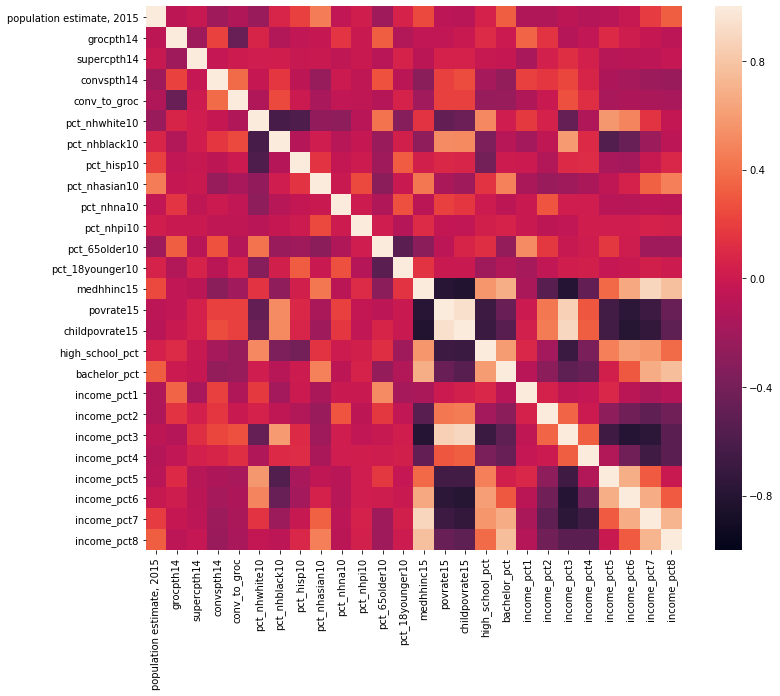

In [2]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, ax=ax)

This heatmap mainly shows the obvious; household income is correlated with the poverty rate and with other income brackets. To investigate the correlations better, I will filter the correlation matrix for |correlation| > 0.5

In [3]:
corr_mat = df.iloc[:,:22].corr()
corr_mat5 = (corr_mat
              .apply(lambda srs: srs
                     .map(lambda x: 
                          None if ((x>-0.5) and (x<0.5)) or x==1 else x)))
corr_mat5.iloc[corr_mat5.notnull().sum().values.astype(bool),
               corr_mat5.notnull().sum().values.astype(bool)]

,pct_nhwhite10,pct_nhblack10,pct_hisp10,pct_65older10,pct_18younger10,medhhinc15,povrate15,childpovrate15,high_school_pct,bachelor_pct
pct_nhwhite10,NaN,-0.618745,-0.589915,NaN,NaN,NaN,NaN,NaN,0.501797,NaN
pct_nhblack10,-0.618745,NaN,NaN,NaN,NaN,NaN,0.516887,0.511894,NaN,NaN
pct_hisp10,-0.589915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_65older10,NaN,NaN,NaN,NaN,-0.526114,NaN,NaN,NaN,NaN,NaN
pct_18younger10,NaN,NaN,NaN,-0.526114,NaN,NaN,NaN,NaN,NaN,NaN
medhhinc15,NaN,NaN,NaN,NaN,NaN,NaN,-0.783640,-0.814689,0.564405,0.683994
povrate15,NaN,0.516887,NaN,NaN,NaN,-0.783640,NaN,0.938094,-0.684317,NaN
childpovrate15,NaN,0.511894,NaN,NaN,NaN,-0.814689,0.938094,NaN,-0.694933,-0.534614
high_school_pct,0.501797,NaN,NaN,NaN,NaN,0.564405,-0.684317,-0.694933,NaN,0.597843
bachelor_pct,NaN,NaN,NaN,NaN,NaN,0.683994,NaN,-0.534614,0.597843,NaN


Now we can observe some correlations that are not trivial such as the median household income increasing as high school graduation rate increases or the increase in poverty rate with increasing percent of population who is black.

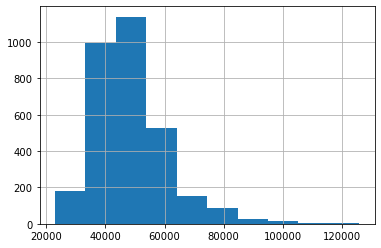

In [4]:
df['medhhinc15'].hist()

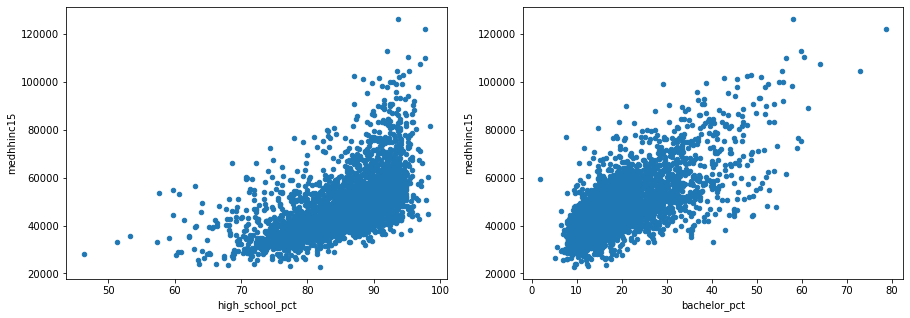

In [5]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
df.plot.scatter('high_school_pct', 'medhhinc15', ax=axes[0])
df.plot.scatter('bachelor_pct', 'medhhinc15', ax=axes[1])

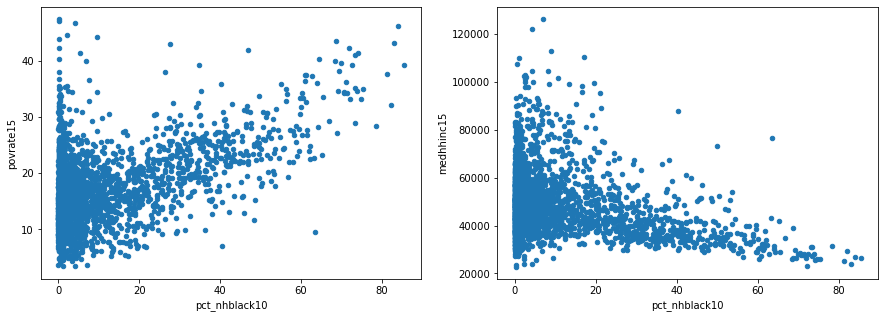

In [6]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
df.plot.scatter('pct_nhblack10', 'povrate15', ax=axes[0])
df.plot.scatter('pct_nhblack10', 'medhhinc15', ax=axes[1])

Now that I have looked at the variables that are correlated, I will look at which varibles are correlated to the number of grocery and convenience stores in a county.

In [7]:
df.corr().iloc[:,[1,3,4]].sort_values(by='conv_to_groc')

,grocpth14,convspth14,conv_to_groc
grocpth14,1.000000,0.216050,-0.467250
high_school_pct,0.103851,-0.175116,-0.245173
bachelor_pct,-0.003111,-0.259080,-0.236065
medhhinc15,-0.049168,-0.306625,-0.196580
pct_nhasian10,-0.028569,-0.246337,-0.170911
income_pct8,-0.071088,-0.233502,-0.165252
income_pct5,0.098117,-0.144364,-0.165246
income_pct7,-0.023534,-0.223046,-0.158566
income_pct6,0.015258,-0.177933,-0.141613
income_pct1,0.343765,0.199038,-0.135051


conv_to_groc measures the ratio of convenience stores to grocery stores in a county. Counties with a high value for this variable likely have lower access to grocery stores. 

The variables most correlated to conv_to_groc are:
- pct_nhblack10
- high_school_pct
- bachelor_pct
- povrate15
- medhhinc15

I have seen in previous plots that the first 4 are all correlated to median income so I will look at how it relates to the number of stores.

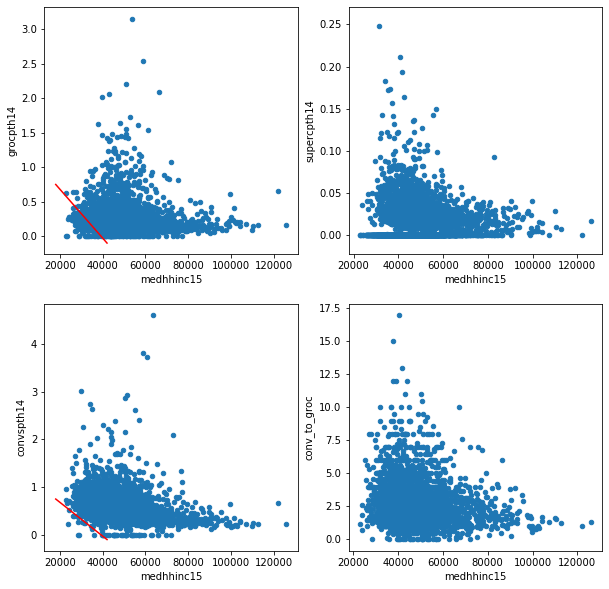

In [8]:
f, axes = plt.subplots(2, 2, figsize=(10,10))
df.plot.scatter('medhhinc15', 'grocpth14', ax=axes[0,0])
df.plot.scatter('medhhinc15', 'supercpth14', ax=axes[0,1])
df.plot.scatter('medhhinc15', 'convspth14', ax=axes[1,0])
df.plot.scatter('medhhinc15', 'conv_to_groc', ax=axes[1,1])
axes[0,0].plot([18000, 42000], [.75, -0.1], 'r-')
axes[1,0].plot([18000, 42000], [.75, -0.1], 'r-')

The red lines in the grocery and conevnience store plots show that very few low income counties have a low number of convenience stores, but they do have low numbers of grocery stores. This can also be inferred from the bottom right hand graph which shows that the only counties with a high convenience store to grocery + super store ratio are lower income counties.

Since these points have significant overlap, I will also plot a heatmap of these variables.

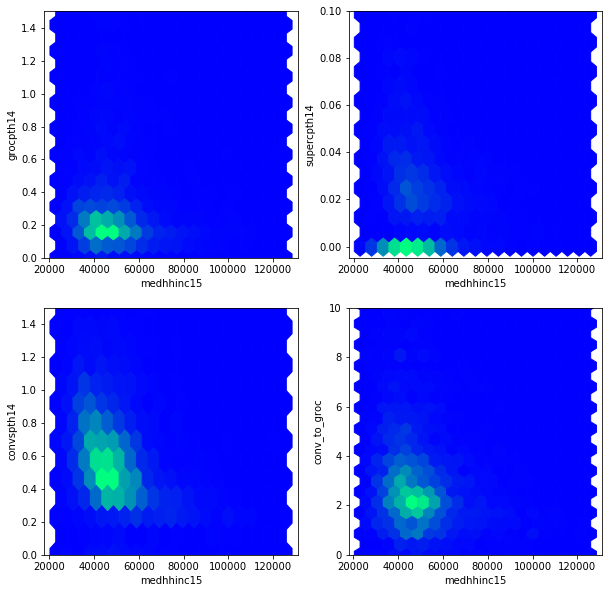

In [9]:
f, axes = plt.subplots(2, 2, figsize=(10,10))
df.plot.hexbin('medhhinc15', 'grocpth14', ylim=(0, 1.5), ax=axes[0,0], colormap='winter', colorbar=False, gridsize=(20,20))
df.plot.hexbin('medhhinc15', 'supercpth14', ylim=(-0.005, 0.1), ax=axes[0,1], colormap='winter', colorbar=False, gridsize=(20,20))
df.plot.hexbin('medhhinc15', 'convspth14', ylim=(0, 1.5), ax=axes[1,0], colormap='winter', colorbar=False, gridsize=(20,20))
df.plot.hexbin('medhhinc15', 'conv_to_groc', ylim=(0, 10), ax=axes[1,1], colormap='winter', colorbar=False, gridsize=(20,20))
plt.show()

From these investigations, I have found 3 variables (pct_nhbalck10, high_school_pct, bachelor_pct) that are strongly correlated to median household income and that all 4 of these are correlated with the ratio of convenience to grocery stores.